In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import pandas as pd

In [16]:
from scipy.spatial import distance_matrix
from sklearn.linear_model import LinearRegression

In [3]:
import random

In [4]:
def regression_based_outlier_detection(ts_data, neighbor, station, n_regressors = 3, n_variables = 3, eps=1) :
    result = np.array([], dtype='int')
    for i in range(n_regressors) : 
        idx = random.choices(neighbor[station],k=n_variables)
        y = ts_data[station] 
        X = ts_data[idx]
        reg = LinearRegression().fit(X.T, y)
#         print(reg.score(X.T, y))
        original = ts_data[station]
        predict = reg.intercept_ + np.dot(X.T, reg.coef_)
#         print(abs(predict - original))
        ix = np.where(abs(predict - original) > eps)
#         print(ix)
        result = np.append(result, ix)
#         print(result)

    unique, counts = np.unique(result, return_counts=True)
    RESULT = dict(zip(unique, counts))
#     print(RESULT)
    return {k: v for k, v in sorted(RESULT.items(), key=lambda item: item[1])}

    
    

# CREATING SIMULATION DATA

In [45]:
x_length = 200
y_length = 200

n_stations = 10000

k = 10


In [46]:
#random metadata creation 
metadata = np.zeros((n_stations,2), dtype='int')
for i in range(n_stations) : 
    x = random.choice(range(x_length))
    y = random.choice(range(y_length))
    metadata[i] = [x,y]



In [7]:
import pickle

In [8]:
metadata = pickle.load(open('metadata.p', 'rb'))

In [9]:
metadata_location = metadata[:, 1:]

In [10]:
#neighbor list
dist_matrix = distance_matrix(metadata_location,metadata_location)
neighbor = dist_matrix.argsort()[:, 1:k+1]

In [44]:
neighbor.shape

(3510, 10)

In [17]:
data=pickle.load(open('data_arranged.pickle','rb'))

In [47]:
#neighbor list
dist_matrix = distance_matrix(metadata,metadata)
neighbor = dist_matrix.argsort()[:, 1:k+1]

<BarContainer object of 3239 artists>

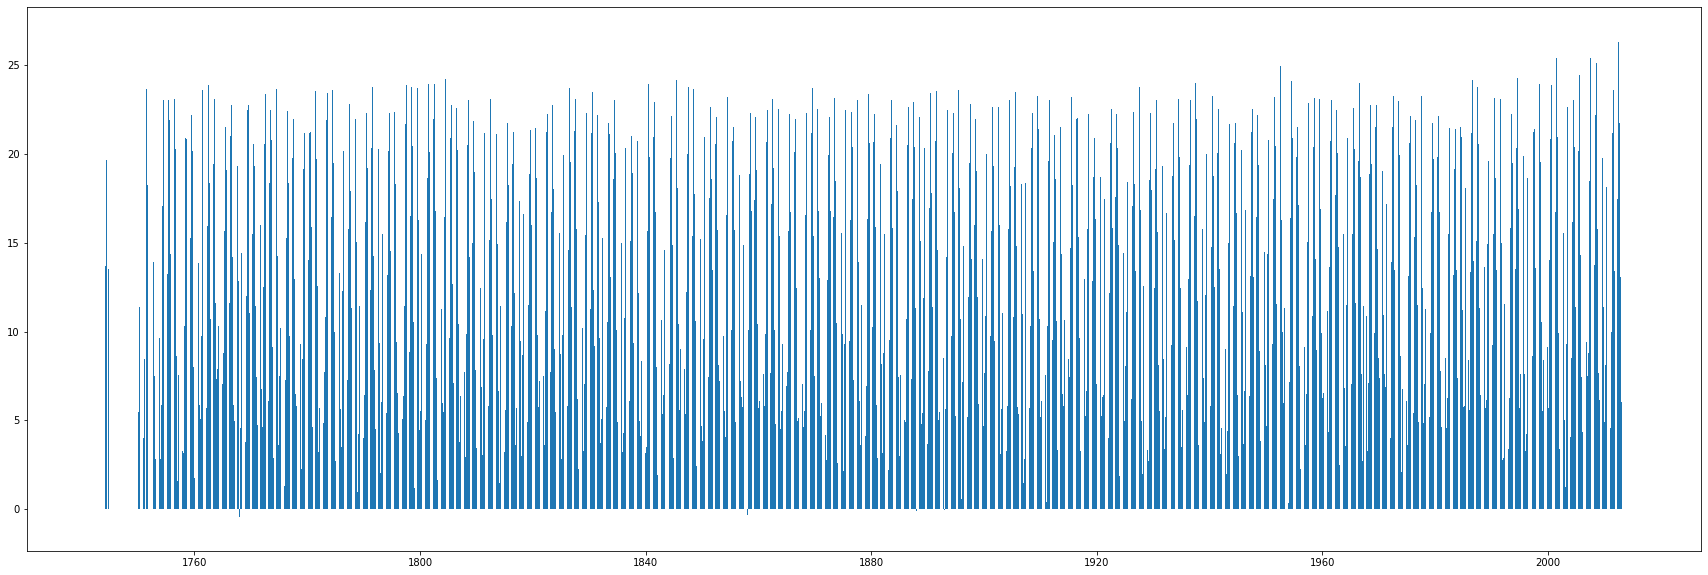

In [32]:
plt.figure(figsize=(30,10))
plt.bar(data.columns, data.iloc[1], width=20)

In [48]:
time_length = 10000


In [49]:
#random data creation 
ts_data = np.zeros((n_stations, time_length))
lst_failed_station = {}
s = random.choice(range(20,30,1))
for time_step in range(time_length) :        
    temperature = random.choice(range(s-3,s+3,1))
    val = temperature + np.random.rand(n_stations)    
    #add random noise with 10% prop
    if random.random() < 0.1 : 
        failed_station = random.choice(range(n_stations))
        noise = random.random() * 20
        sign = random.choice([-1,1])
        
        val[failed_station] = val[failed_station] + noise * sign 
        print(failed_station, time_step, "\t", sign, "\t", noise)
        
        lst_failed_station[failed_station] =[time_step, sign * noise]
        
    
    ts_data[:,time_step] = val
# print(len(lst_failed_station))
    

8114 2 	 1 	 7.885547791814817
5220 33 	 1 	 12.277261158324178
4867 36 	 -1 	 16.983289061160743
6771 44 	 1 	 3.183802544671084
7283 51 	 -1 	 4.349861365884269
5303 84 	 1 	 5.62100123170338
7457 86 	 -1 	 5.955521901813194
6856 93 	 1 	 10.679180094017868
8972 112 	 1 	 10.302536157301871
3246 124 	 1 	 18.035995109977762
452 129 	 -1 	 3.2063538165600813
9576 142 	 1 	 6.696108896497273
1571 171 	 1 	 11.202984877558517
9760 173 	 1 	 16.600191078992935
6074 209 	 1 	 7.5003279986503095
9111 218 	 -1 	 7.042931260579661
5060 224 	 1 	 3.810513214167315
6297 235 	 -1 	 7.259518123802087
2586 260 	 1 	 1.695137494445338
6018 266 	 1 	 0.2083926475331377
8583 271 	 -1 	 11.220214899381562
2914 278 	 -1 	 18.834480591277224
7855 282 	 1 	 15.99426009663112
7545 305 	 -1 	 0.5592095767456828
237 322 	 -1 	 16.746565282513274
3344 330 	 1 	 17.779488475332354
7837 344 	 -1 	 8.625075147354979
9056 365 	 -1 	 4.780343379551326
9023 369 	 1 	 0.7383574496623102
3732 370 	 -1 	 4.209606236

177 2596 	 -1 	 10.685039181137515
3562 2606 	 -1 	 2.967310816899813
1705 2616 	 -1 	 16.653294962281844
5582 2627 	 1 	 19.916903025593335
1561 2628 	 1 	 2.336741473521964
5551 2632 	 1 	 10.874023637406305
9035 2634 	 -1 	 13.87689603121287
1666 2636 	 -1 	 18.691751138735178
6033 2639 	 1 	 2.6733126651409567
3559 2649 	 -1 	 16.676047591605595
6085 2657 	 -1 	 0.21455818312121622
2175 2679 	 1 	 8.633499768557837
4125 2689 	 1 	 8.25503612171511
662 2695 	 1 	 12.681665912264448
2529 2698 	 1 	 3.6433456688596944
1244 2700 	 1 	 14.508473754689692
390 2702 	 1 	 8.590227020020109
2721 2720 	 1 	 17.95995762927008
93 2722 	 1 	 13.771078055177494
2311 2737 	 1 	 2.6375415992917106
1248 2767 	 -1 	 17.87781523444862
8637 2771 	 1 	 8.32935418778453
1137 2779 	 1 	 9.760753635670042
1795 2789 	 1 	 6.118890811506916
859 2791 	 -1 	 8.126817898855027
8243 2806 	 1 	 5.789667001078103
8214 2809 	 -1 	 8.023422285889815
6141 2822 	 -1 	 19.294274366214186
284 2845 	 -1 	 0.622381737613

5681 5289 	 1 	 1.3534896286887221
5768 5310 	 -1 	 14.868499861936968
5066 5319 	 -1 	 0.5220929088427861
4995 5321 	 -1 	 19.249063165423316
2184 5335 	 1 	 12.904172122729126
3510 5336 	 1 	 6.586766410795852
5240 5344 	 -1 	 10.351745961019335
5775 5346 	 1 	 16.40192874201533
7034 5363 	 -1 	 15.059340761711086
4003 5369 	 1 	 16.529726980157463
8991 5370 	 1 	 11.948859525152422
5513 5404 	 1 	 5.466552787601005
7784 5427 	 -1 	 13.16668533916151
32 5439 	 1 	 13.652775230307132
5785 5440 	 -1 	 3.7664008606189414
2218 5456 	 -1 	 9.91635070794915
2606 5457 	 1 	 1.3419242050029245
1965 5476 	 1 	 19.627476472612603
2304 5495 	 1 	 15.56314660603
4127 5509 	 1 	 17.287845364927723
929 5539 	 1 	 0.1284557026137123
1996 5544 	 -1 	 12.961725520034875
8097 5547 	 1 	 16.550884332287957
2939 5552 	 1 	 1.3760081795597445
7451 5560 	 -1 	 4.785289825773297
3246 5569 	 -1 	 10.960683279864995
9192 5574 	 1 	 10.189062290341353
1288 5581 	 -1 	 1.527307081480791
1676 5594 	 -1 	 13.308

5386 8277 	 -1 	 16.490955733051397
1066 8287 	 -1 	 9.286666011110196
2821 8307 	 1 	 8.965921199375334
7946 8326 	 1 	 11.671540404755525
1329 8342 	 1 	 15.300664275974064
2029 8384 	 -1 	 13.323403290502718
9777 8391 	 -1 	 0.5708792946331909
9293 8398 	 1 	 6.119767616560217
2037 8404 	 -1 	 1.395502504467263
4373 8412 	 -1 	 4.506752745353733
2764 8414 	 -1 	 2.935847055475551
571 8419 	 -1 	 0.7064548796787373
1044 8430 	 -1 	 5.818397434296136
736 8433 	 1 	 18.268781488698604
9825 8441 	 -1 	 14.352049753324394
3666 8454 	 -1 	 17.40913755101274
3905 8458 	 1 	 17.008636634618856
8346 8471 	 -1 	 19.119546060768393
6130 8492 	 -1 	 19.541227338978977
4857 8502 	 1 	 15.858116536880491
7017 8541 	 1 	 0.5412041056593941
85 8559 	 1 	 9.43792678602394
6151 8577 	 1 	 5.626147340469608
8640 8591 	 -1 	 17.288336381660375
8857 8607 	 1 	 0.5488417408025659
2951 8609 	 1 	 11.934248234079865
2728 8642 	 1 	 14.188356268272592
8335 8654 	 -1 	 7.1384720494482305
7370 8655 	 1 	 1.51

In [39]:
n_stations

10000

In [42]:
time_length

10000

In [50]:
len(lst_failed_station)

899

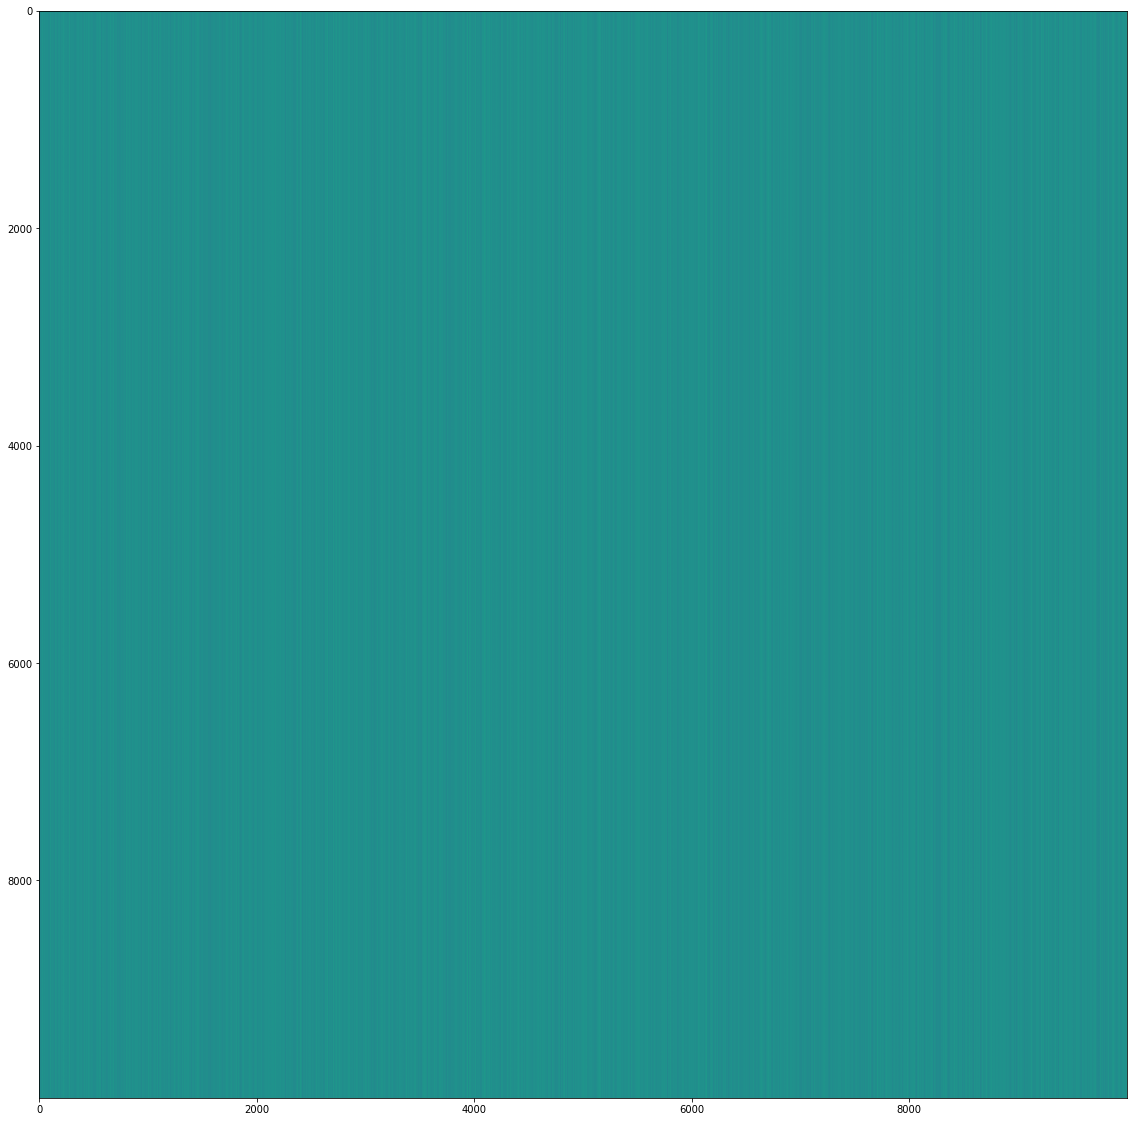

In [51]:
plt.figure(figsize=(20,20))
plt.imshow(ts_data)

In [53]:
for station in lst_failed_station.keys() : 
    i = station
    result = regression_based_outlier_detection(ts_data, neighbor, station=i, n_regressors = 10, n_variables = 3, eps=2)
    print(station, ": ", result.get(lst_failed_station[station][0],-1))
    print(result)
#     plt.plot(ts_data[neighbor[station]].T, color='gray')
#     plt.plot(ts_data[station], color='red')

8114 :  10
{2: 10}
5220 :  10
{33: 10}
4867 :  10
{36: 10}
6771 :  8
{7517: 2, 44: 8}
7283 :  10
{7852: 2, 51: 10}
5303 :  10
{84: 10}
7457 :  10
{86: 10}
6856 :  10
{93: 10}
8972 :  8
{112: 8}
3246 :  10
{124: 10, 5569: 10}
452 :  10
{129: 10, 1012: 10}
9576 :  10
{142: 10}
1571 :  10
{171: 10}
9760 :  10
{1278: 1, 7269: 3, 209: 5, 173: 10, 4124: 10}
6074 :  10
{1482: 1, 209: 10}
9111 :  10
{218: 10}
5060 :  6
{3012: 2, 8805: 2, 224: 6}
6297 :  10
{5336: 5, 235: 10}
2586 :  -1
{}
6018 :  -1
{6486: 3}
8583 :  10
{271: 10}
2914 :  10
{8964: 3, 4715: 4, 482: 5, 278: 10}
7855 :  10
{958: 2, 282: 10}
7545 :  -1
{3199: 3, 9658: 3}
237 :  10
{6687: 4, 322: 10}
3344 :  10
{1939: 4, 330: 10}
7837 :  10
{616: 2, 8129: 2, 344: 10}
9056 :  10
{365: 10}
9023 :  -1
{}
3732 :  10
{1960: 1, 370: 10}
373 :  10
{388: 10}
8332 :  -1
{5946: 5}
5962 :  10
{400: 10}
5338 :  10
{410: 10}
5398 :  -1
{}
3142 :  -1
{3841: 3}
3015 :  10
{419: 10}
8467 :  10
{8774: 3, 426: 10}
2350 :  10
{428: 10}
6136 :  9
{987

1426 :  10
{3947: 3, 3286: 10, 4059: 10}
4729 :  10
{3290: 10}
8230 :  10
{5865: 1, 3291: 10}
3156 :  10
{3292: 10}
1692 :  7
{3465: 2, 3299: 7}
5848 :  10
{6784: 3, 3310: 10}
6934 :  10
{7299: 3, 9332: 4, 3328: 10}
5200 :  5
{3329: 5}
8000 :  10
{8918: 4, 3340: 10}
650 :  10
{7373: 1, 9370: 2, 3344: 10}
6121 :  10
{972: 6, 3360: 10, 8686: 10}
2895 :  -1
{4084: 2}
2602 :  10
{6527: 1, 3413: 10}
9945 :  10
{1012: 1, 2169: 3, 3431: 10}
3919 :  10
{3433: 10}
8048 :  -1
{}
4605 :  10
{3299: 1, 3465: 10}
2248 :  -1
{2722: 1}
6726 :  10
{3469: 10}
6197 :  10
{6274: 2, 3476: 10, 8682: 10}
2167 :  10
{4582: 2, 7906: 2, 3506: 10}
8200 :  10
{3527: 10}
2478 :  10
{2789: 1, 567: 4, 3528: 10}
6674 :  10
{3533: 10}
1186 :  10
{3544: 10}
1823 :  10
{6796: 3, 3552: 10}
2001 :  10
{3554: 10}
4360 :  -1
{}
3078 :  4
{3574: 4}
8471 :  10
{3985: 5, 3605: 10}
507 :  10
{3616: 10}
4575 :  10
{3621: 10}
6684 :  10
{3632: 10}
9336 :  10
{3639: 10}
3220 :  10
{3653: 10}
3390 :  10
{4762: 4, 3657: 10}
3832 :  

2601 :  10
{3840: 2, 5615: 2, 6813: 10}
1843 :  10
{6836: 10}
7455 :  10
{6838: 10}
615 :  10
{6839: 10}
1730 :  10
{4638: 3, 6853: 10}
7264 :  10
{1814: 1, 9003: 5, 6875: 10}
8710 :  -1
{410: 1}
4304 :  -1
{8384: 3}
5079 :  10
{1482: 1, 6885: 10}
501 :  10
{6898: 10}
4095 :  10
{1068: 2, 6912: 10}
1852 :  10
{6924: 10}
6201 :  10
{1836: 2, 6927: 10}
6754 :  8
{6929: 8}
8374 :  10
{7518: 1, 6945: 10}
9257 :  10
{6954: 10}
3529 :  10
{2689: 3, 6711: 5, 6972: 10}
1382 :  10
{6975: 10}
5999 :  10
{4617: 1, 6984: 10}
416 :  10
{3977: 3, 6994: 10}
5995 :  -1
{6685: 2}
7393 :  -1
{6274: 1}
776 :  10
{3360: 3, 8686: 3, 7051: 10}
3976 :  10
{1888: 3, 7062: 10}
5301 :  10
{3076: 3, 7083: 10}
6101 :  10
{7087: 10}
7226 :  10
{7101: 10}
3298 :  10
{9229: 2, 7103: 10}
9673 :  10
{9355: 2, 4306: 5, 7134: 10}
2700 :  10
{7144: 10}
5541 :  10
{7153: 10}
5099 :  10
{7165: 10}
6475 :  10
{7166: 10}
6971 :  -1
{3231: 4}
2006 :  10
{8307: 4, 7223: 10}
1970 :  -1
{}
473 :  10
{7245: 10}
3886 :  10
{7247: 

In [ ]:
for i in range(n_stations) : 
#     plt.figure()    
    RESULT = regression_based_outlier_detection(ts_data, neighbor, station, n_regressors = 5, n_variables = 2, eps=1)
    if len(RESULT) > 0 : 
        print(i, RESULT)
#     plt.plot(ts_data[neighbor[i]].T, color='gray')
#     plt.plot(ts_data[i].T, color='red')
# print("\n")

In [ ]:
dist_matrix = distance_matrix(metadata,metadata)

In [52]:
while True : 
    i = random.choice(range(n_stations))
    result = regression_based_outlier_detection(ts_data, neighbor, station=i, n_regressors = 10, n_variables = 3, eps=2)
    if len(result) > 0 : 
        print(i, result)
        print(lst_failed_station[i])
        break
    
y = lst_failed_station[i][0]
plt.figure()
plt.imshow(ts_data[i-3:i+4, y-5: y+6])


2000 {8240: 3}


KeyError: 2000

In [ ]:
plt.plot(predict - original)